# Disciplina de Mecânica Clássica (Mestrado - UFRGS)

* Aqui há códigos utilizados na apresentação sobre Sistemas Caóticos.
* Gráficos iterativos
* Gifs e animações sobre o Diagrama de Bifurcação

---

# Classical Mechanics Course (Master's - UFRGS)

* Here are codes used in the presentation on Chaotic Systems.
* Iterative plots
* GIFs and animations about the Bifurcation Diagram

---

## Plot of Feigenbaun Functions and Logistc Equation

In [34]:
import matplotlib.pyplot as plt

# logistic function
def logistic(R, x0, N, png_counter):    
    x = x0
    x_list = [x0]
    for i in range(N-1):      
        x = R * x * (1. - x)
        x_list.append(x)
        
    plt.style.use('seaborn-whitegrid')
    fig, ax = plt.subplots(figsize=(16, 6), facecolor='lightgray')
    ax.set_xlabel('The number of iterations')
    ax.set_ylabel('The value of x')
    ax.set_title(f'\nLogistic Equation\n\nR={R}  |  x0={x0}\n')
    ax.plot(x_list, 'o:r')

    if png_counter != 0:
        plt.savefig(f'logistic_equation_{png_counter}.png')
        
    plt.show()

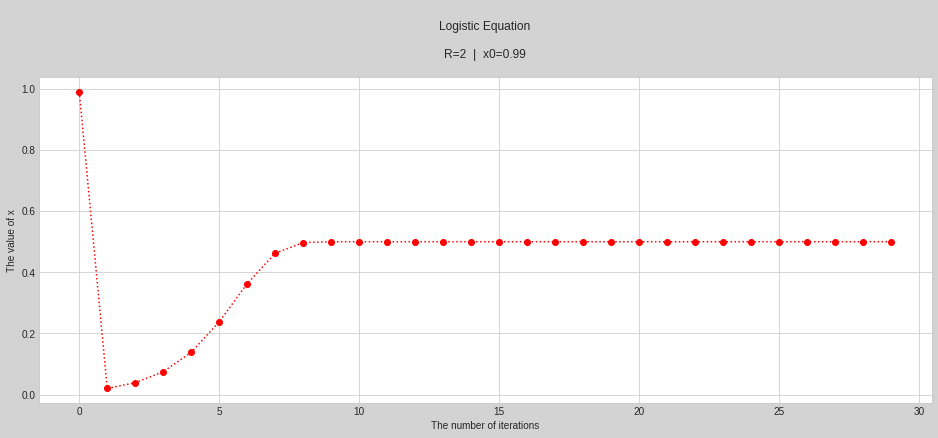

In [22]:
logistic(2, 0.99, 30, 103)

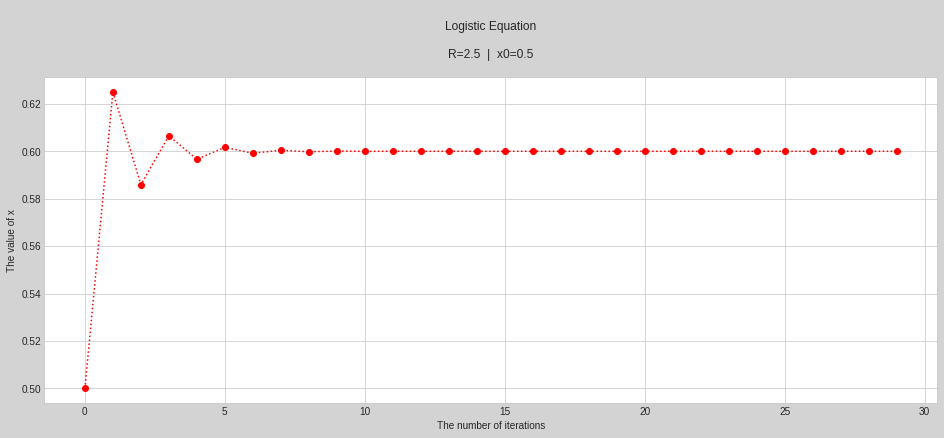

In [23]:
logistic(2.5, 0.5, 30, 105)

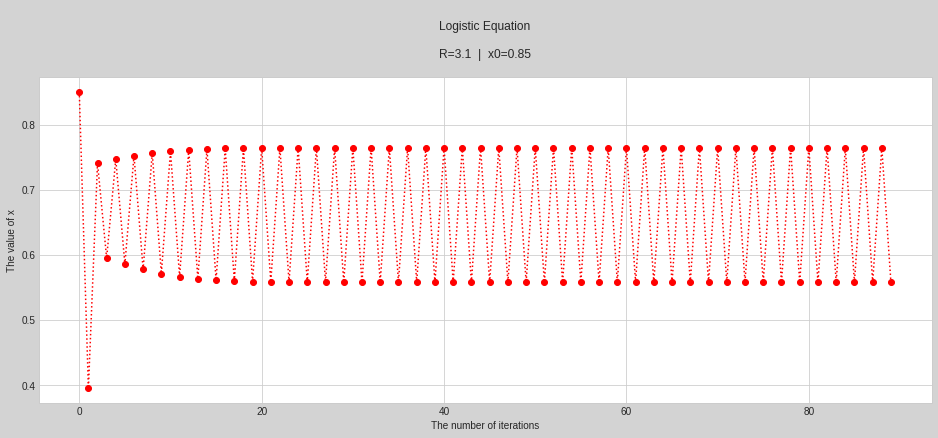

In [24]:
logistic(3.1, 0.85, 90, 108)

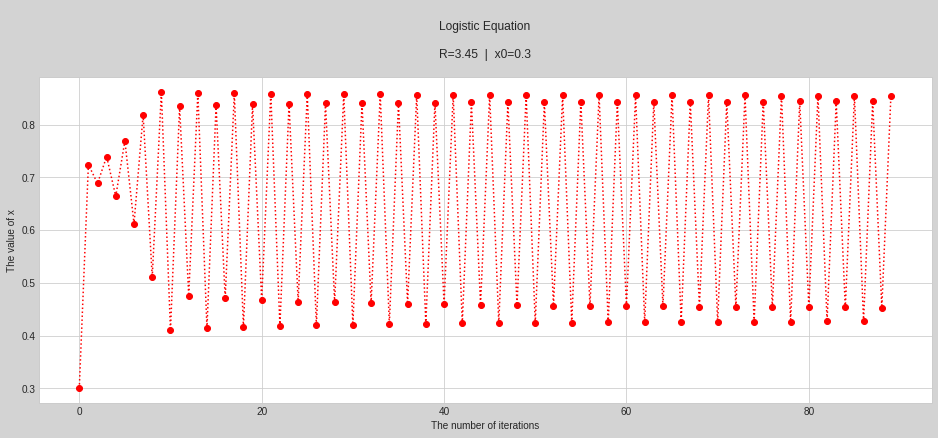

In [25]:
logistic(3.45, 0.30, 90, 109)

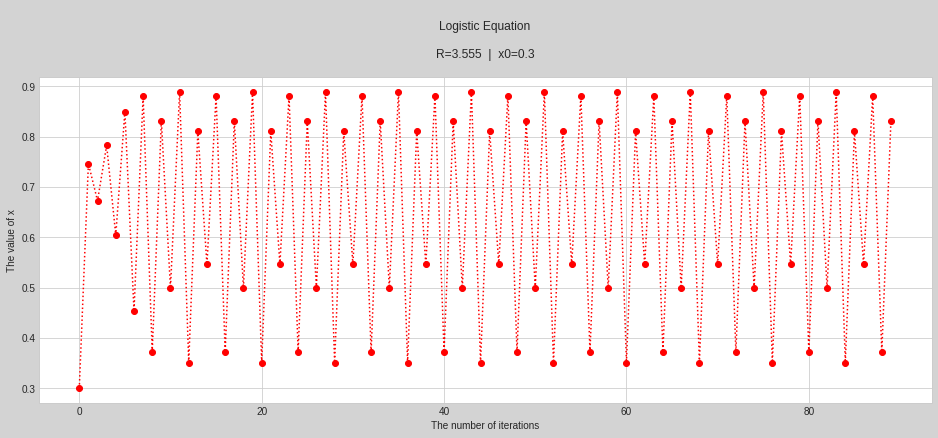

In [26]:
logistic(3.555, 0.30, 90, 110)

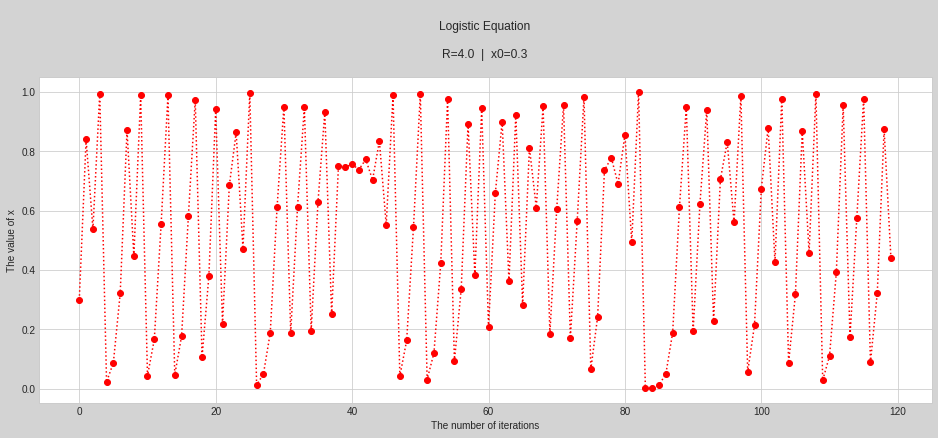

In [27]:
logistic(4.0, 0.30, 120, 201)

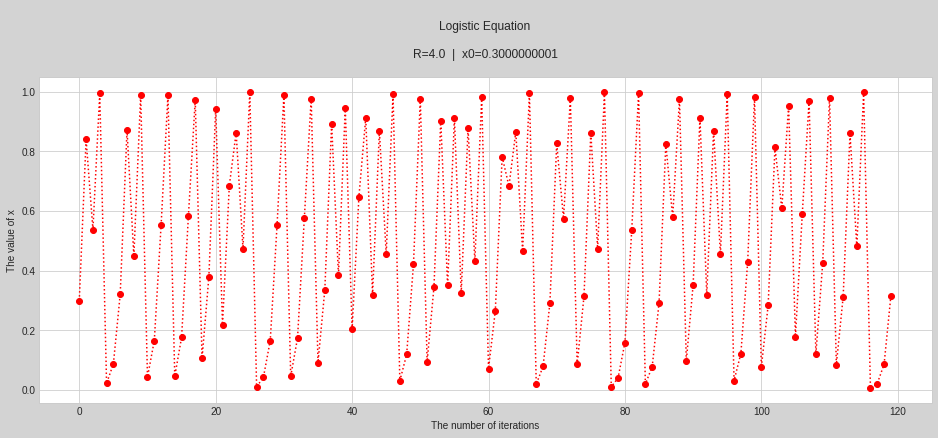

In [28]:
logistic(4.0, 0.3000000001, 120, 202)

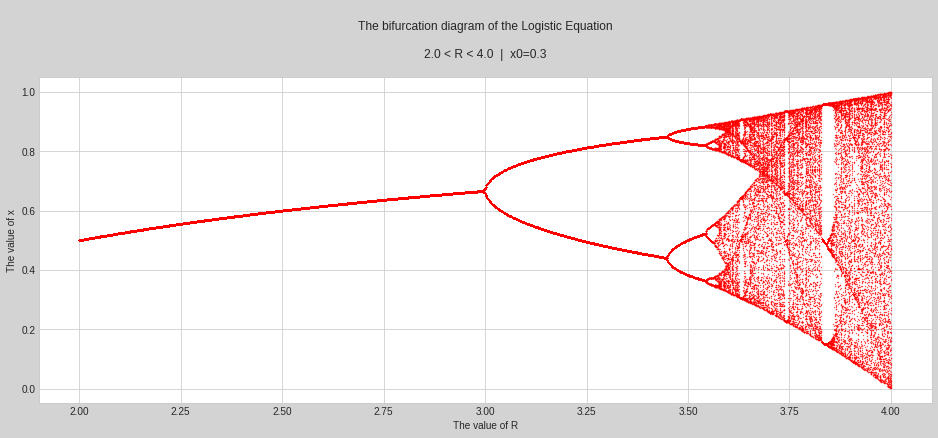

In [29]:
R_list = np.linspace(2.0, 4.0, 1000)
x0 = 0.3
N = 500

def logis(r):
    x_list = [x0]    
    for i in range(N-1):
        x_list.append(r * x_list[-1] * (1 - x_list[-1]))
    return x_list[400:]

x_select = []
R_select = []
for r in R_list:
    x_select.append(logis(r))
    R_select.append([r] * 100) 
    
x_select = np.array(x_select).ravel()
R_select = np.array(R_select).ravel()

plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(16, 6), facecolor='lightgray')
plt.xlabel('The value of R')
plt.ylabel('The value of x')
plt.title(f'\nThe bifurcation diagram of the Logistic Equation\n\n2.0 < R < 4.0  |  x0=0.3\n')
plt.scatter(R_select, x_select, color='red', s=0.1)
plt.savefig('bifurcation_diagram.png')
plt.show()

# Interactive plot Bifurcation Diagram of the Logistic Equation

* Use buttons for control the Logistc function region plot

In [30]:
import ipywidgets as widgets
from ipywidgets import interact

def plota_Feigenbaum(a,b):
    R_list = np.linspace(a, b, 1000)
    x0 = 0.3
    N = 500

    def logis(r):
        x_list = [x0]    
        for i in range(N-1):
            x_list.append(r * x_list[-1] * (1 - x_list[-1]))
        return x_list[400:]

    x_select = []
    R_select = []
    for r in R_list:
        x_select.append(logis(r))
        R_select.append([r] * 100) 

    x_select = np.array(x_select).ravel()
    R_select = np.array(R_select).ravel()
    
    plt.style.use('seaborn-whitegrid')
    plt.figure(figsize=(16, 6), facecolor='lightgray')
    plt.xlabel('The value of R')
    plt.ylabel('The value of x')
    plt.title(f'\nThe bifurcation diagram of the Logistic Equation\n\n2.0 < R < 4.0  |  x0=0.3\n')
    plt.scatter(R_select, x_select, color='red', s=0.1)
    plt.savefig('bifurcation_diagram.png')
    plt.show()
    
def plota_Feigenbaum2(a,b):
    R_list = np.linspace(a, b, 1000)
    x0 = 0.3
    N = 500

    def logis(r):
        x_list = [x0]    
        for i in range(N-1):
            x_list.append(r * x_list[-1] * (1 - x_list[-1]))
        return x_list[400:]

    x_select = []
    R_select = []
    for r in R_list:
        x_select.append(logis(r))
        R_select.append([r] * 100) 

    x_select = np.array(x_select).ravel()
    R_select = np.array(R_select).ravel()
    
    return R_select,x_select

Text(0.5, 1.0, 'A single plot')

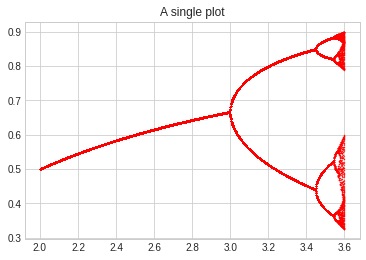

In [31]:
# Test for a 'Single State (2.0,3.6)' Plot

fig, ax = plt.subplots()
x,y = plota_Feigenbaum2(2.0,3.6)  
ax.scatter(x, y, color='red', s=0.1)
ax.set_title('A single plot')

In [32]:
@interact
def plota_interact( a=(2.00,3.99,0.01), b=(3.5,4.00,0.01) ):
    return plota_Feigenbaum(a,b)

interactive(children=(FloatSlider(value=2.99, description='a', max=3.99, min=2.0, step=0.01), FloatSlider(valu…

## Animation Bifurcation Diagram of the Logistic Equation

/tmp/ipykernel_176255/4100979637.py:17: RuntimeWarning: overflow encountered in scalar multiply
  x_list.append(r * x_list[-1] * (1 - x_list[-1]))
/tmp/ipykernel_176255/4100979637.py:17: RuntimeWarning: overflow encountered in scalar multiply
  x_list.append(r * x_list[-1] * (1 - x_list[-1]))


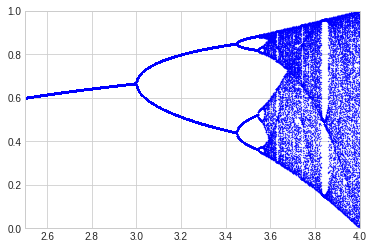

In [33]:
from matplotlib import pyplot as plt
import numpy as np
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

fig, ax = plt.subplots()
ax.set_xlim(2.5, 4)
ax.set_ylim(0, 1)
line, = ax.plot([], [], 'b.', markersize=0.5)

def plota_Feigenbaum2(a, b, x0=0.3, N=500):
    R_list = np.linspace(a, b, 1000)

    def logis(r):
        x_list = [x0]
        for i in range(N-1):
            x_list.append(r * x_list[-1] * (1 - x_list[-1]))
        return x_list[400:]

    x_select = []
    R_select = []
    for r in R_list:
        x = logis(r)
        x_select.extend(x)
        R_select.extend([r] * len(x))

    return R_select, x_select

def init():
    line.set_data([], [])
    return line,

def animate(i):
    a = 2.5
    b = 2.6 + (i / 10.0) * 0.6  # Variação de 'b' com base no índice do quadro
    R_select, x_select = plota_Feigenbaum2(a, b)
    line.set_data(R_select, x_select)
    return line,

anim = FuncAnimation(fig, animate, init_func=init, frames=30, interval=200, blit=True)

# Salva o vídeo
anim.save('LogisticEquation_animation.mp4', writer='ffmpeg', fps=30)

# Para visualizar no Jupyter Notebook
HTML(anim.to_jshtml())
